<a href="https://colab.research.google.com/github/Jmd1704/2025-segundo-semestre-ia-economia/blob/main/Taller_Regresion_Logistica_Jimenez_Medina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/3_Taller_Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Regresión Logística**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- Carlos Jimenez
- Juan Medina

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_Reg_Logist_apellidos.ipynb”.

**Plazo de entrega**

4 de noviembre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

**Contexto del Caso: Consultoría de Fuga de Clientes (Churn)**

Somos un equipo de consultores contratados por "TelcoSur", una empresa de telecomunicaciones preocupada por su tasa de cancelación de servicios (Churn). Retener a un cliente existente es entre 5 y 25 veces más barato que adquirir uno nuevo, por lo que predecir quiénes están en riesgo de irse es crucial para la salud financiera de la empresa.

**Tu Misión:** Como científico de datos, tu objetivo es construir un modelo de clasificación que identifique a los clientes con alta probabilidad de cancelar su contrato. El departamento de marketing utilizará tu modelo para lanzar una campaña de retención (ofreciendo descuentos y beneficios) a un grupo selecto de clientes.

## Ejercicio 1: Importar Librerías y Cargar Datos

### 1.1. Importa las librerías necesarias

In [ ]:
### TU CÓDIGO AQUÍ ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mejorar visualización de dataframes y gráficos

In [ ]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### 1.2. Carga el dataset

Carga el dataset "WA_Fn-UseC_-Telco-Customer-Churn.csv" que se encuentra en la carpeta 'datasets' del repositorio del curso.

**Explicación de las variables:**

- customerID: Identificador único para cada cliente.
- gender: Género del cliente (Masculino/Femenino).
- SeniorCitizen: Indica si el cliente es un ciudadano mayor (adulto mayor) (1 = Sí, 0 = No).
- Partner: Indica si el cliente tiene pareja (Sí/No).
- Dependents: Indica si el cliente tiene dependientes (Sí/No).
- tenure: Número de meses que el cliente ha estado con la compañía (Antigüedad).
- PhoneService: Si el cliente está suscrito al servicio telefónico (Sí/No).
- MultipleLines: Indica si el cliente tiene múltiples líneas telefónicas (Sí/No/Sin servicio telefónico).
- InternetService: Tipo de servicio de internet suscrito (DSL, Fibra óptica, No).
- OnlineSecurity: Indica si el cliente tiene el complemento de seguridad en línea (Sí/No/Sin servicio de internet).
- OnlineBackup: Indica si el cliente usa el servicio de respaldo en línea (Sí/No/Sin servicio de internet).
- DeviceProtection: Indica si el cliente tiene protección de dispositivos (Sí/No/Sin servicio de internet).
- TechSupport: Indica si el cliente tiene suscripción a soporte técnico (Sí/No/Sin servicio de internet).
- StreamingTV: Indica si el cliente hace streaming de TV (Sí/No/Sin servicio de internet).
- StreamingMovies: Indica si el cliente hace streaming de películas (Sí/No/Sin servicio de internet).
- Contract: Tipo de contrato (Mes a mes, Un año, Dos años).
- PaperlessBilling: Si el cliente usa facturación electrónica (sin papel) (Sí/No).
- PaymentMethod: Método de pago usado por el cliente (Cheque electrónico, Cheque enviado por correo, Transferencia bancaria, Tarjeta de crédito).
- MonthlyCharges: El monto cobrado al cliente mensualmente (Cargos mensuales).
- TotalCharges: El monto total cobrado al cliente durante su antigüedad (Cargos totales).
- Churn: Indica si el cliente ha cancelado el servicio (Sí/No). --> **Esta es la variable objetivo**

In [ ]:
### TU CÓDIGO AQUÍ ###
df = pd.read_excel("/content/WA_Fn-UseC_-Telco-Customer-Churn.xlsx" , header=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Ejercicio 2: Limpieza de Datos

Antes de modelar, debemos entender y limpiar nuestros datos.

### 2.1. Revisa los tipos de datos y busca valores nulos.

Pista: Usa `df.info()`.

In [ ]:
### TU CÓDIGO AQUÍ ###
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### 2.2. Convierte TotalCharges a un tipo de dato numérico.

Aquellos valores que no se puedan convertir (errores), transfórmalos en NaN (Not a Number).  

Pista: Usa pd.to_numeric(df['TotalCharges'], errors='coerce').

In [ ]:
### TU CÓDIGO AQUÍ ###
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### 2.3. Investiga cuántos valores nulos tienes en la columna TotalCharges.

In [ ]:
### TU CÓDIGO AQUÍ ###
df["TotalCharges"].isnull().sum()

np.int64(11)

**Decisión de Negocio:**
Los valores nulos en `TotalCharges` corresponden a clientes nuevos (`tenure` = 0). Para este análisis, dado que son pocos (11), tomaremos la decisión de eliminarlos.

### 2.4. Elimina las filas con valores nulos.

In [ ]:
### TU CÓDIGO AQUÍ ###
df = df.dropna()

 ### 2.5. Convierte la columna `Churn` a formato binario (1 si es 'Yes', 0 si es 'No')

In [ ]:
### TU CÓDIGO AQUÍ ###
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
print(f"El número final de filas en el DataFrame es: {len(df)}")

El número final de filas en el DataFrame es: 7032


## Ejercicio 3: Análisis Exploratorio (EDA)

Revisa si hay desbalance de clases.

Pista: utiliza value_counts(normalize=True)

In [ ]:
### TU CÓDIGO AQUÍ ###
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.73
1,0.27


**Escribe aquí tu análisis:**
El análisis de la variable objetivo Churn revela un claro desbalance de clases, ya que el 73% de los clientes no han cancelado el servicio mientras que solo el 27% sí lo han hecho. Este desequilibrio indica que el conjunto de datos está dominado por clientes que permanecen activos, lo cual puede afectar el desempeño del modelo de clasificación, haciendo que tienda a predecir mayoritariamente la clase mayoritaria.

## Ejercicio 4: Preprocesamiento para el Modelo

Preparamos las variables `X` (predictoras) y `y` (objetivo).

### 4.1. Separa tus datos en `X` (variables predictoras) y `y` (variable objetivo: `Churn`).

Recuerda eliminar `customerID` de `X`, ya que es un identificador y no un predictor.

In [ ]:
### TU CÓDIGO AQUÍ ###
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [ ]:
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

Dimensiones de X: (7032, 19)
Dimensiones de y: (7032,)


### 4.2. Convierte las variables categóricas en X a variables numéricas usando One-Hot Encoding.

Pista: pd.get_dummies(X, drop_first=True).

In [ ]:
### TU CÓDIGO AQUÍ ###
X = pd.get_dummies(X, drop_first=True)

### 4.3. Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%).

Usa 'random_state=42' y 'stratify'.

In [ ]:
### TU CÓDIGO AQUÍ ###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4.4. Estandariza las variables numéricas: ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
### TU CÓDIGO AQUÍ ###
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

## Ejercicio 5: Entrenamiento del Modelo

Entrenamos nuestra Regresión Logística. ¡OJO! No solo guardamos las predicciones (`y_pred`), sino también las **probabilidades** (`y_prob`) que necesitaremos para la Curva ROC.

### 5.1. Entrena un modelo de Regresión Logística

Llama al modelo 'log_model'. Utiliza 'random_state=42' y 'max_iter=1000'


In [ ]:
### TU CÓDIGO AQUÍ ###
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### 5.2. Haz predicciones sobre el conjunto de prueba.

In [ ]:
### TU CÓDIGO AQUÍ ###
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)

### 5.3. Obten las probabilidades de predicción para la clase 1

In [ ]:
### TU CÓDIGO AQUÍ ###
y_prob = y_prob[:, 1]

## Ejercicio 6: Evaluación del Modelo

### 6.1. Calcula y grafica la Matriz de Confusión

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

           0       0.64      0.02      0.04      1033
           1       0.26      0.97      0.41       374

    accuracy                           0.27      1407
   macro avg       0.45      0.49      0.23      1407
weighted avg       0.54      0.27      0.14      1407



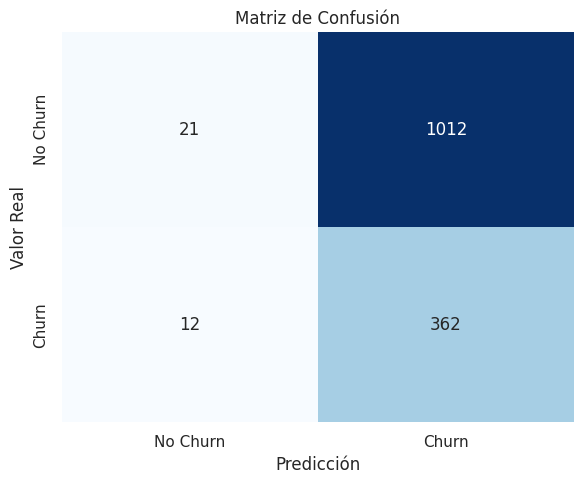

In [ ]:
### TU CÓDIGO AQUÍ ###
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = log_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

**Interpretación:**

**En el contexto de TelcoSur, ¿qué significan estos 4 cuadrantes?**

- **Verdaderos Negativos (VN): `21`**. El modelo predijo correctamente que 21 clientes no cancelarían el servicio (“No Churn”). Estos clientes permanecen activos, y no se incurre en costos de retención innecesarios.
- **Verdaderos Positivos (VP): `362`**. El modelo predijo “Churn” y efectivamente estos clientes sí cancelaron el servicio. Este es un acierto importante, ya que la empresa puede identificar con precisión a una buena parte de los clientes en riesgo y tomar medidas para retenerlos.
- **Falsos Positivos (FP): `1012`**. El modelo predijo que estos clientes se irían, pero en realidad iban a quedarse. Este error tipo I implica gastos innecesarios en campañas de retención, otorgando descuentos o beneficios a clientes que no los necesitaban.
- **Falsos Negativos (FN): `12`**. El modelo predijo “No Churn”, pero estos clientes sí cancelaron el servicio. Este error tipo II es el más costoso desde el punto de vista estratégico, ya que representa clientes perdidos que el modelo no logró detectar a tiempo.

### 6.2. Calcula el Reporte de Clasificación e interpreta los resultados según se indica

In [ ]:
### TU CÓDIGO AQUÍ ###
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.02      0.04      1033
           1       0.26      0.97      0.41       374

    accuracy                           0.27      1407
   macro avg       0.45      0.49      0.23      1407
weighted avg       0.54      0.27      0.14      1407



### 6.3. Interpreta el Accuracy o Exactitud

**Interpretación:**
La exactitud del modelo es del 27%, lo que significa que solo acierta en una de cada cuatro predicciones. Este resultado es muy bajo y muestra que el modelo no está clasificando bien a los clientes. Además, como las clases están desbalanceadas (73% No Churn y 27% Churn), el modelo se inclina demasiado por predecir que los clientes se van, lo que hace que falle con la mayoría de los que realmente se quedan. En otras palabras, aunque identifica bien a quienes cancelan, comete muchos errores con los demás, por lo que es necesario ajustar el modelo o balancear los datos.

### 6.4. Interpreta la Precisión para la Clase 1 (Churn)
**Interpretación:**
La precisión para la clase 1 (Churn) es 0.26, lo que significa que solo el 26% de los clientes que el modelo predijo como propensos a cancelar realmente se fueron. En otras palabras, el modelo genera muchos falsos positivos; está marcando como “en riesgo de irse” a muchos clientes que en realidad iban a quedarse. Esto implica un costo para la empresa, ya que se podrían ofrecer descuentos o beneficios innecesarios a clientes fieles, reduciendo la eficiencia de las campañas de retención.

### 6.5. Interpreta la Sensibilidad o Recall para la Clase 1 (Churn)

**Interpretación:**
La sensibilidad (recall) para la clase 1 (Churn) es 0.97, lo que significa que el modelo logra identificar correctamente al 97% de los clientes que realmente cancelaron el servicio. En otras palabras, casi todos los casos de Churn fueron detectados. Esto es positivo porque el modelo es muy bueno reconociendo a los clientes que están en riesgo de irse, aunque lo hace a costa de cometer muchos falsos positivos. Para la empresa, esto significa que el modelo es útil para no dejar escapar posibles fugas, pero necesita mejorar su precisión para no malgastar recursos reteniendo a clientes que no se iban a ir.

### 6.6. Interpreta la Especificidad

**Interpretación:** La especificidad del modelo es 0.02, lo que significa que solo el 2% de los clientes que realmente se quedaron fueron identificados correctamente como “No Churn”. En otras palabras, el modelo casi siempre se equivoca al clasificar a los clientes fieles, tratándolos como si fueran propensos a cancelar. Esto muestra que el modelo está muy sesgado hacia predecir Churn, lo que puede llevar a gastos innecesarios en campañas de retención dirigidas a clientes que en realidad no pensaban irse.

### 6.7. Interpreta el F1-Score

**Interpretación:** El F1-Score para la clase 1 (Churn) es 0.41, lo que indica que el modelo tiene un desempeño moderadamente bajo al identificar correctamente a los clientes que se van. Esto significa que, aunque el modelo logra detectar la mayoría de los casos de churn (como se ve en el recall alto), comete muchos errores al confundir clientes que no se iban, reduciendo su precisión.

**IMPORTANTE**

Para una campaña de retención de clientes, la métrica más importante es el RECALL (Sensibilidad).

Justificación: En casi todos los modelos de negocio de suscripción (como telecomunicaciones, banca o streaming), el costo de un Falso Negativo (perder un cliente por no identificarlo, Costo FN) es drásticamente mayor que el costo de un Falso Positivo (dar un descuento innecesario, Costo FP).

Perder un cliente implica perder todos sus ingresos futuros. Dar un descuento solo reduce el margen de un cliente que igual se iba a quedar. Por lo tanto, el objetivo estratégico de la empresa debe ser minimizar la cantidad de Falsos Negativos (no dejar que se vaya nadie que pudiéramos haber salvado), lo cual es exactamente lo que mide el Recall.

Nuestro modelo tiene un Recall de 0.97 (para Churn = 1), lo que significa que estamos identificando correctamente al 97% de los clientes que realmente se van. Esto es un resultado muy bueno, ya que el modelo logra detectar casi todos los casos de cancelación. Sin embargo, esta alta sensibilidad puede estar acompañada de una baja precisión, lo que indica que también estamos clasificando erróneamente a muchos clientes que en realidad no se iban. Aun así, para una campaña de retención, este comportamiento es aceptable, pues lo más importante es no dejar escapar a los clientes que sí están en riesgo de irse, incluso si eso implica ofrecer descuentos innecesarios a algunos que iban a permanecer.

## Ejercicio 7: La Curva ROC y el Poder de Discriminación (AUC)

### 7.1. Grafica la Curva ROC

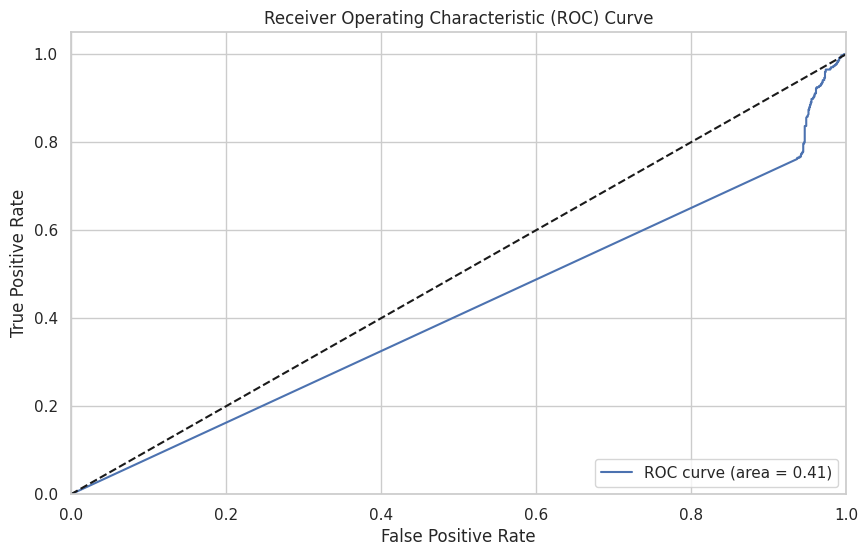

In [ ]:
### TU CÓDIGO AQUÍ ###
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 7.2. Calcula el Área Bajo la Curva

In [ ]:
### TU CÓDIGO AQUÍ ###
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {roc_auc:.2f}")

AUC: 0.41


**Interpretación Final:**

Nuestro modelo tiene un **AUC de 0.41**, lo cual indica un bajo poder de discriminación entre los clientes que se van (Churn) y los que se quedan (No Churn). En otras palabras, el modelo **no está logrando diferenciar adecuadamente ambos grupos**, y su desempeño es incluso peor que un modelo aleatorio (que tendría un AUC de 0.5). Esto sugiere que el problema no es el umbral de decisión, sino el modelo en sí, que probablemente necesita mejoras en sus variables, balance de clases o en el algoritmo utilizado.

**Siguiente paso (decisión de negocio)**: antes de ajustar el umbral, se recomienda reentrenar o optimizar el modelo, aplicando técnicas de balanceo, selección de características o prueba de algoritmos más robustos. El objetivo es construir un modelo que realmente logre distinguir entre clientes en riesgo y clientes fieles, para que luego sí tenga sentido ajustar el umbral y optimizar la estrategia de retención.